In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
from textblob import TextBlob


In [3]:
import tweepy

In [14]:
consumer_key='DIFJW5pZ86e02FZeyet4TsMJz'
consumer_secret ='v1ZqyssRIqB5619N6DHU4rEcd3OkT8EZFcVfU6jwpFxaViXS0H'
access_token ='726188178995032064-J1FjjpDvGIU1i2rVyQyStKOckTkpfky'
access_token_secret ='85QklgO4jd38ZROiOS52npWgusAp9TZqRlXUn3T2lWiwq'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


public_tweets = api.search('Cats')


for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        print('Positive')  
    elif analysis.sentiment[0]<0:
        print('Negative')   
    else:
        print('Neutral')

RT @MailOnline: Dogs really are a man's best friend: More cats than dogs were abandoned during coronavirus lockdown, figures reveal
https:/…
Sentiment(polarity=0.5666666666666667, subjectivity=0.3333333333333333)
Positive
RT @missenell: Meeow 😍
#cats #Caturday https://t.co/XGMJ1rfm7O
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@omakaseP かなぁ　詳細聞くよ？今旅行中だから返事する時間不安定になるけど
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Roshinee_M: Tried this TikTok strategy to stop cats from lying down on your keyboard when doing work - it actually worked on Ram 🧐 http…
Sentiment(polarity=-0.07777777777777779, subjectivity=0.19444444444444448)
Negative
@kiiwisoda @sufjan_cats oh no he angy
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @jkjmminie: I have 2 cats &amp; have grown up with cats all my life &amp; they extremely picky &amp; very hard to impress. The ways cats/kittens ope…
Sentiment(polarity=-0.2520833333333333, subjectivity=0.8520833333333333)
Negative
RT @minsungbase: /ms/ min

In [15]:
# converting tweets into a dataframe w column name as Tweets
import pandas as pd

df = pd.DataFrame([tweets.text for tweets in public_tweets], columns=['Tweets'])

# adding columns for the resp polarity and subjectivity
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity
df['polarity'] = df['Tweets'].apply(polarity)
df['subjectivity'] = df['Tweets'].apply(subjectivity)
df.head(10)

,Tweets,polarity,subjectivity
0,RT @MailOnline: Dogs really are a man's best f...,0.566667,0.333333
1,RT @missenell: Meeow 😍\n#cats #Caturday https:...,0.000000,0.000000
2,@omakaseP かなぁ 詳細聞くよ？今旅行中だから返事する時間不安定になるけど,0.000000,0.000000
3,RT @Roshinee_M: Tried this TikTok strategy to ...,-0.077778,0.194444
4,@kiiwisoda @sufjan_cats oh no he angy,0.000000,0.000000
5,RT @jkjmminie: I have 2 cats &amp; have grown ...,-0.252083,0.852083
6,RT @minsungbase: /ms/ minsung as cats 😽😻\n\nht...,0.000000,0.000000
7,RT @ellaarivai: Hi @KKCity My bf &amp; I just ...,0.000000,0.000000
8,I’m pretty certain cats were humans in their f...,0.154762,0.523810
9,RT @seoblicious: i cant believe all these whil...,-0.600000,0.900000


In [16]:
# To calculate if the sentiment_analysis is +ve, -ve or neutral
# if ratio >1 then +ve, if ratio = 0 then neutral and if <0 then -ve

def ratio(x):
 if x > 0:
    return 1
 elif x == 0:
        return 0
 else:
    return -1

df['sentiment_analysis'] = df['polarity'].apply(ratio)

df


,Tweets,polarity,subjectivity,sentiment_analysis
0,RT @MailOnline: Dogs really are a man's best f...,0.566667,0.333333,1
1,RT @missenell: Meeow 😍\n#cats #Caturday https:...,0.000000,0.000000,0
2,@omakaseP かなぁ 詳細聞くよ？今旅行中だから返事する時間不安定になるけど,0.000000,0.000000,0
3,RT @Roshinee_M: Tried this TikTok strategy to ...,-0.077778,0.194444,-1
4,@kiiwisoda @sufjan_cats oh no he angy,0.000000,0.000000,0
5,RT @jkjmminie: I have 2 cats &amp; have grown ...,-0.252083,0.852083,-1
6,RT @minsungbase: /ms/ minsung as cats 😽😻\n\nht...,0.000000,0.000000,0
7,RT @ellaarivai: Hi @KKCity My bf &amp; I just ...,0.000000,0.000000,0
8,I’m pretty certain cats were humans in their f...,0.154762,0.523810,1
9,RT @seoblicious: i cant believe all these whil...,-0.600000,0.900000,-1


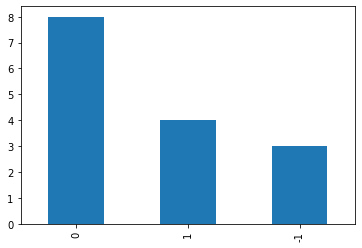

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting count graph
df['sentiment_analysis'].value_counts().plot(kind = 'bar')